In [1]:
from google.colab import files
uploaded = files.upload()


Saving flight_data.csv to flight_data (1).csv


Initial Shape: (3000, 14)

First 5 Rows:
    Flight ID    Airline  Flight_Distance Origin_Airport Destination_Airport  \
0    7319483  Airline D              475      Airport 3           Airport 2   
1    4791965  Airline E              538      Airport 5           Airport 4   
2    2991718  Airline C              565      Airport 1           Airport 2   
3    4220106  Airline E              658      Airport 5           Airport 3   
4    2263008  Airline E              566      Airport 2           Airport 2   

   Scheduled_Departure_Time  Day_of_Week  Month Airplane_Type  Weather_Score  \
0                         4            6      1        Type C       0.225122   
1                        12            1      6        Type B       0.060346   
2                        17            3      9        Type C       0.093920   
3                         1            1      8        Type B       0.656750   
4                        19            7     12        Type E       0.505211   

  

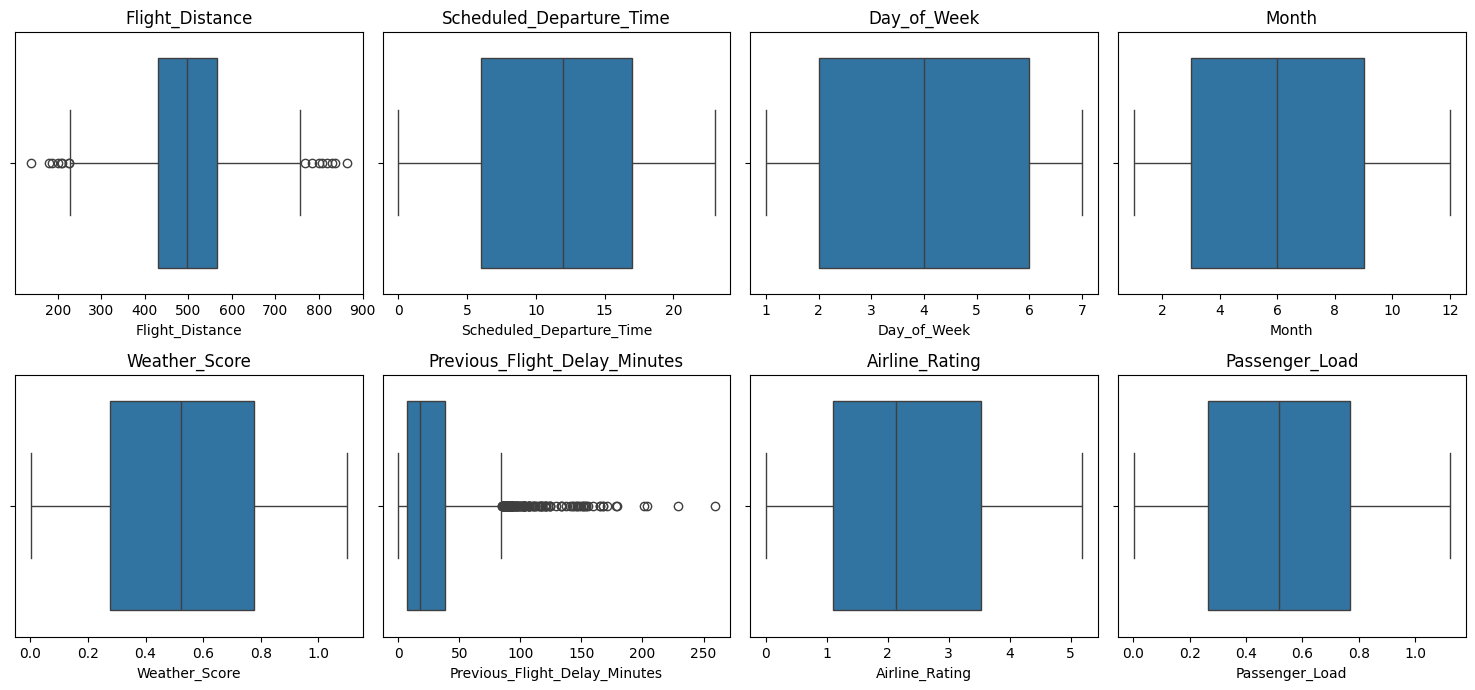


Shape after outlier removal: (2939, 14)

✅ Cleaned dataset saved as 'flyzy_flight_cancellation_cleaned_ravi7pspk.csv'


<ipython-input-4-a99a6e61c6f2>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns=['Flight ID'], inplace=True)


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('/content/flight_data.csv')

print("Initial Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())

print("\nMissing Values:\n", df.isnull().sum())

for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing Values After Cleaning:\n", df.isnull().sum())

print("\nData Types Before:\n", df.dtypes)

df['Flight ID'] = df['Flight ID'].astype(str)
df['Day_of_Week'] = df['Day_of_Week'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Flight_Cancelled'] = df['Flight_Cancelled'].astype(int)

print("\nData Types After:\n", df.dtypes)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('Flight_Cancelled')

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

z_scores = np.abs(stats.zscore(df[numeric_cols]))
df_clean = df[(z_scores < 3).all(axis=1)]

print(f"\nShape after outlier removal: {df_clean.shape}")

df_clean.drop(columns=['Flight ID'], inplace=True)

output_filename = "flyzy_flight_cancellation_cleaned_ravi7pspk.csv"
df_clean.to_csv(output_filename, index=False)
print(f"\n✅ Cleaned dataset saved as '{output_filename}'")
